In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import tools
import importlib
importlib.reload(tools)

<module 'tools' from '/home/eliska/evolution/code/tools.py'>

In [4]:
morphotopes = gpd.read_parquet('/data/uscuni-evolution/all_joined_es.parquet')
morphotopes

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
morphotope_id,,,,,,,,,,,,,,,,,,,,,
154261_8_36,"MULTIPOLYGON (((1789241.062 949382.272, 178924...",False,1,2,4,6,9,19,39,195,...,0.759629,0.914997,0.539197,20.036945,2.971040,2.971040,1605.328009,397.015570,1.0,127882.778479
154261_8_15,"MULTIPOLYGON (((1791357.734 950171.017, 179134...",False,1,2,5,8,12,24,49,337,...,0.590045,0.889519,0.516493,15.857084,2.232566,2.232566,65.587205,86.590409,1.0,4916.183878
154261_8_43,"MULTIPOLYGON (((1790727.323 950061.979, 179071...",False,1,2,4,6,9,19,39,117,...,0.762957,0.769257,0.519012,21.063154,2.505593,2.505593,122.162041,164.151911,1.0,7038.301487
154261_8_44,"MULTIPOLYGON (((1790282.906 949980.539, 179028...",False,1,2,5,8,12,23,47,88,...,0.777555,0.914812,0.576181,19.852994,3.199170,3.199170,239.851597,105.721956,1.0,11586.979732
154261_8_12,"MULTIPOLYGON (((1790098.677 950107.553, 179009...",False,2,4,7,12,18,40,75,139,...,0.745158,0.731604,0.633084,19.051113,2.523666,2.523666,62.511889,475.682975,1.0,2467.937565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203563_3386_0,"MULTIPOLYGON (((3187951.949 2296756.088, 31879...",False,2,4,8,17,25,56,107,122,...,0.426940,0.873167,0.396421,37.267361,4.245372,4.245372,82.796284,66.890818,1.0,16195.180303
203563_3354_0,"MULTIPOLYGON (((3191244.215 2295952.134, 31912...",False,1,2,5,8,13,29,60,80,...,0.659152,0.820535,0.438996,27.924375,3.423645,3.423645,104.125130,85.447676,1.0,7156.151167
203563_3381_0,"MULTIPOLYGON (((3185087.668 2292981.736, 31850...",False,2,4,7,13,20,47,87,87,...,0.649014,0.733694,0.409142,34.758868,3.526355,3.526355,64.184792,71.947088,1.0,5635.600224


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, '(1690, 1700]'),
  Text(1, 0, '(1700, 1710]'),
  Text(2, 0, '(1710, 1720]'),
  Text(3, 0, '(1740, 1750]'),
  Text(4, 0, '(1750, 1760]'),
  Text(5, 0, '(1760, 1770]'),
  Text(6, 0, '(1770, 1780]'),
  Text(7, 0, '(1780, 1790]'),
  Text(8, 0, '(1790, 1800]'),
  Text(9, 0, '(1800, 1810]'),
  Text(10, 0, '(1810, 1820]'),
  Text(11, 0, '(1820, 1830]'),
  Text(12, 0, '(1830, 1840]'),
  Text(13, 0, '(1840, 1850]'),
  Text(14, 0, '(1850, 1860]'),
  Text(15, 0, '(1860, 1870]'),
  Text(16, 0, '(1870, 1880]'),
  Text(17, 0, '(1880, 1890]'),
  Text(18, 0, '(1890, 1900]'),
  Text(19, 0, '(1900, 1910]'),
  Text(20, 0, '(1910, 1920]'),
  Text(21, 0, '(1920, 1930]'),
  Text(22, 0, '(1930, 1940]'),
  Text(23, 0, '(1940, 1950]'),
  Text(24, 0, '(1950, 1960]'),
  Text(25, 0, '(1960, 1970]'),
  Text(26, 0, '(1970,

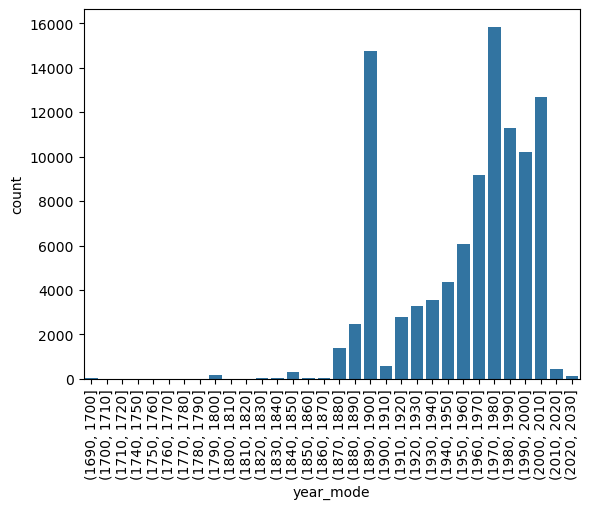

In [7]:
sns.countplot(x='year_mode', data=morphotopes, order=sorted(morphotopes["year_mode"].unique())  # alphabetical order
)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

In [8]:
pivot3 = tools.pivot_tbl(morphotopes,3)
pivot3.to_csv("tables/proportions3_es.csv")

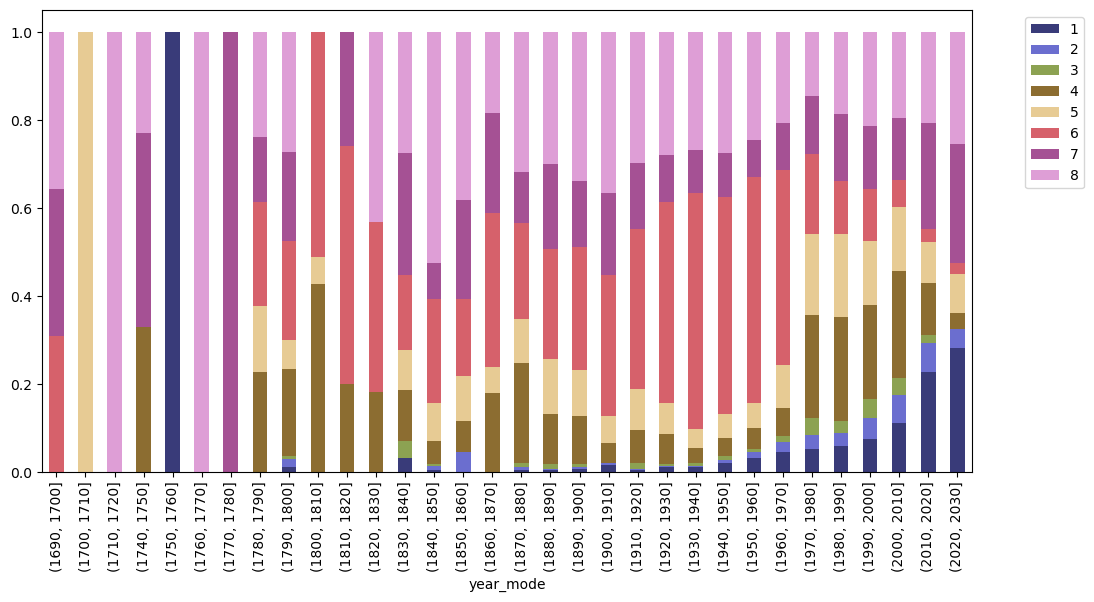

In [9]:
tools.hist(pivot3)

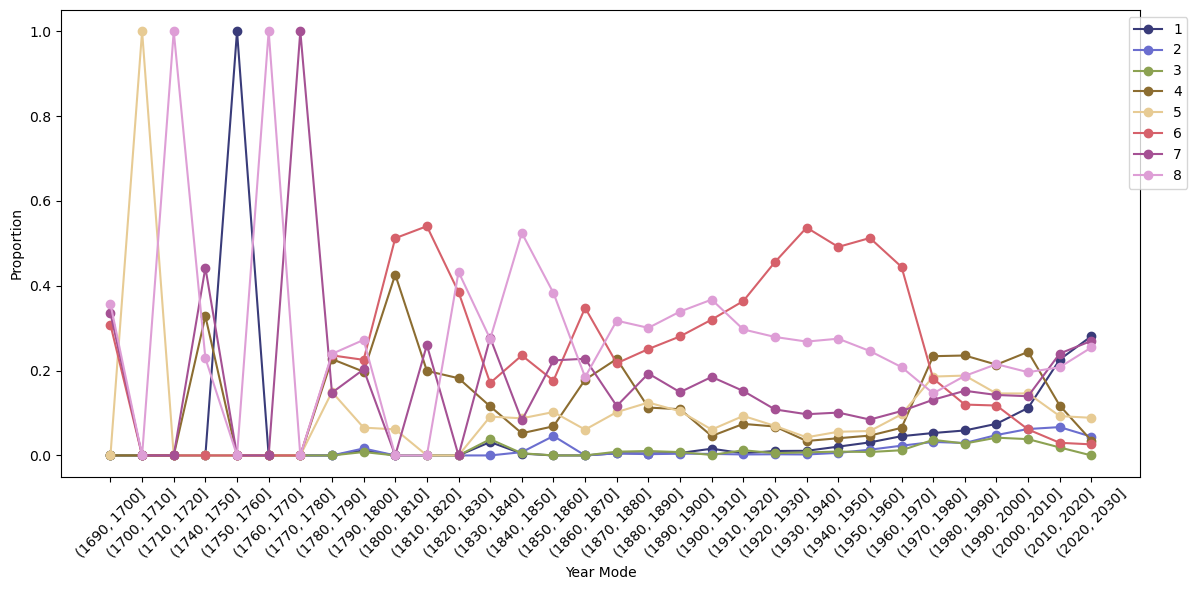

In [10]:
tools.line_plot(pivot3)

In [11]:
pivot3_cum = tools.pivot_tbl_cum(morphotopes,3)
pivot3_cum

level_3_label,1,2,3,4,5,6,7,8
year_mode,,,,,,,,
"(1690, 1700]",0.000000,0.000000,0.000000,0.000000,0.000000,0.308217,0.335100,0.356683
"(1700, 1710]",0.000000,0.000000,0.000000,0.000000,0.042769,0.295034,0.320768,0.341428
"(1710, 1720]",0.000000,0.000000,0.000000,0.000000,0.041273,0.284715,0.309549,0.364463
"(1740, 1750]",0.000000,0.000000,0.000000,0.044974,0.035617,0.245699,0.327800,0.345910
"(1750, 1760]",0.024153,0.000000,0.000000,0.043888,0.034757,0.239764,0.319882,0.337555
"(1760, 1770]",0.023482,0.000000,0.000000,0.042669,0.033792,0.233104,0.310997,0.355956
"(1770, 1780]",0.022982,0.000000,0.000000,0.041760,0.033072,0.228139,0.325673,0.348374
"(1780, 1790]",0.019826,0.000000,0.000000,0.067215,0.049081,0.229207,0.301257,0.333414
"(1790, 1800]",0.013149,0.014080,0.006843,0.178138,0.063093,0.225932,0.217369,0.281394


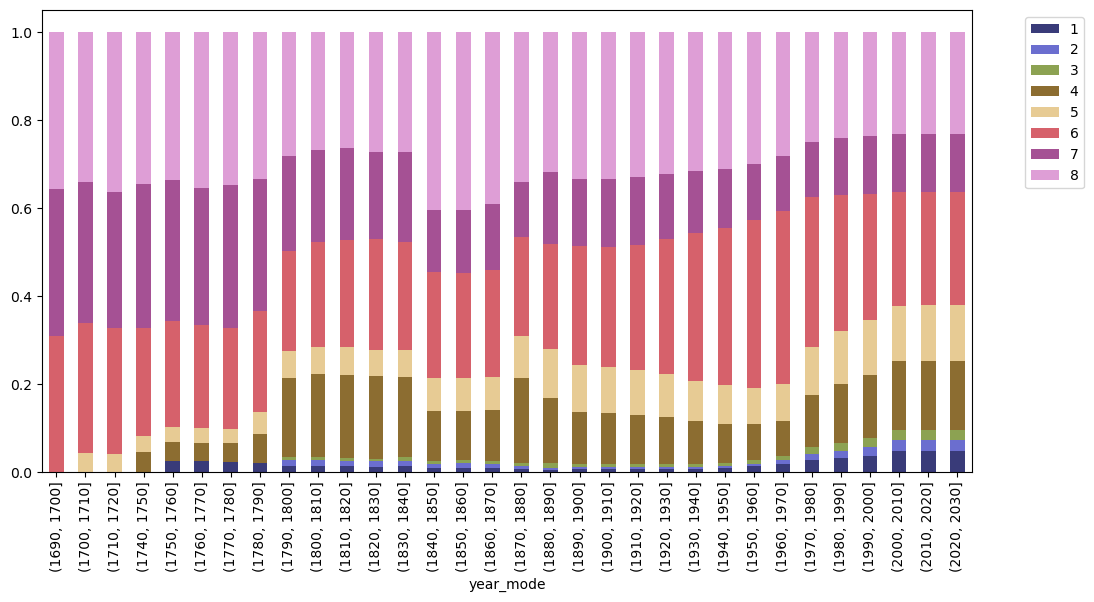

In [12]:
tools.hist(pivot3_cum)

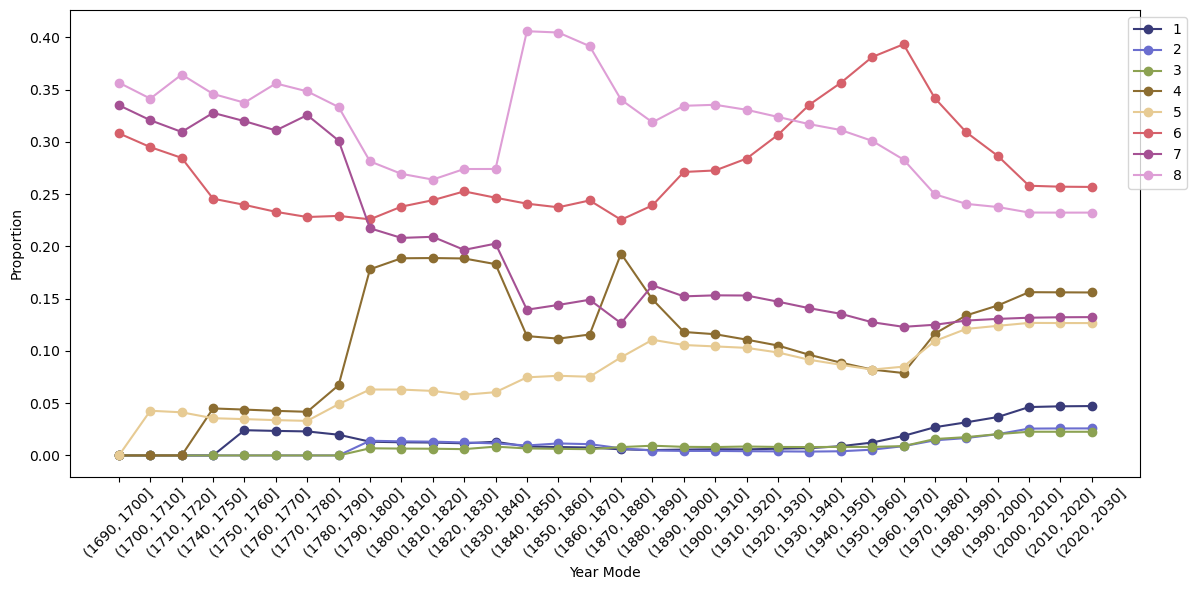

In [13]:
tools.line_plot(pivot3_cum)

In [14]:
nuts = gpd.read_file(
    "https://gisco-services.ec.europa.eu/distribution/v2/nuts/gpkg/NUTS_RG_01M_2024_3035.gpkg"
)

In [15]:
nuts1 = nuts[(nuts["CNTR_CODE"]=='ES') & (nuts["LEVL_CODE"]==1)]
nuts1

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
1692,ES4,1,ES,Centro (ES),Centro (ES),NaN,NaN,NaN,"MULTIPOLYGON (((3119024.908 2348901.57, 311945..."
1693,ES5,1,ES,Este,Este,NaN,NaN,NaN,"MULTIPOLYGON (((3815056.85 1904971.998, 381575..."
1694,ES1,1,ES,Noroeste,Noroeste,NaN,NaN,NaN,"MULTIPOLYGON (((2906664.993 2459935.68, 290763..."
1696,ES2,1,ES,Noreste,Noreste,NaN,NaN,NaN,"MULTIPOLYGON (((3292146.19 2348078.268, 329208..."
1697,ES3,1,ES,Comunidad de Madrid,Comunidad de Madrid,NaN,NaN,NaN,"MULTIPOLYGON (((3186880.464 2108577.267, 31867..."
1698,ES6,1,ES,Sur,Sur,NaN,NaN,NaN,"MULTIPOLYGON (((3373675.473 1694193.779, 33734..."
1699,ES7,1,ES,Canarias,Canarias,NaN,NaN,NaN,"MULTIPOLYGON (((2030100.836 1030388.524, 20298..."


In [16]:
morphotopes_centr = morphotopes.copy()
morphotopes_centr["geometry"] = morphotopes_centr.geometry.centroid
morphotopes_centr.columns

Index(['geometry', 'initially_noise', 'level_1_label', 'level_2_label',
       'level_3_label', 'level_4_label', 'level_5_label', 'level_6_label',
       'level_7_label', 'num_buildings', 'year_mean', 'year_median',
       'year_min', 'year_q10', 'year_q90', 'year_max', 'year_std', 'year_mode',
       'sdbAre', 'sdbPer', 'sdbCoA', 'ssbCCo', 'ssbSqu', 'ssbERI', 'ssbElo',
       'libNCo', 'ldbPWL', 'ltcBuA', 'mtbAli', 'mtbNDi', 'ltbIBD', 'stbSAl',
       'sdsLen', 'sssLin', 'ldsMSL', 'ldsRea', 'ldsAre', 'sisBpM', 'sdsSPW',
       'sdsSPO', 'sdsSWD', 'lcdMes', 'linP3W', 'linP4W', 'linPDE', 'lcnClo',
       'lddNDe', 'linWID', 'ldsCDL', 'xcnSCl', 'mtdMDi', 'sddAre', 'midRea',
       'midAre', 'sdcLAL', 'sdcAre', 'sscCCo', 'sscERI', 'mtcWNe', 'mdcAre',
       'ltcWRB', 'sicCAR', 'sdsAre', 'mibCou', 'mibAre', 'mibLen', 'mibElo',
       'mibERI', 'mibCCo', 'mibLAL', 'mibFR', 'mibSCo', 'micBAD', 'midBAD',
       'limLPS', 'limAre'],
      dtype='object')

In [17]:
joined = morphotopes_centr.sjoin(nuts1, predicate="within")

In [18]:
joined

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,...,limAre,index_right,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE
morphotope_id,,,,,,,,,,,,,,,,,,,,,
154261_8_36,POINT (1789578.638 949496.363),False,1,2,4,6,9,19,39,195,...,127882.778479,1699,ES7,1,ES,Canarias,Canarias,NaN,NaN,NaN
154261_8_15,POINT (1791535.393 950318.026),False,1,2,5,8,12,24,49,337,...,4916.183878,1699,ES7,1,ES,Canarias,Canarias,NaN,NaN,NaN
154261_8_43,POINT (1790914.079 950308.314),False,1,2,4,6,9,19,39,117,...,7038.301487,1699,ES7,1,ES,Canarias,Canarias,NaN,NaN,NaN
154261_8_44,POINT (1790429.531 950102.94),False,1,2,5,8,12,23,47,88,...,11586.979732,1699,ES7,1,ES,Canarias,Canarias,NaN,NaN,NaN
154261_8_12,POINT (1790149.912 950261.925),False,2,4,7,12,18,40,75,139,...,2467.937565,1699,ES7,1,ES,Canarias,Canarias,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203563_3386_0,POINT (3188155.518 2296979.319),False,2,4,8,17,25,56,107,122,...,16195.180303,1694,ES1,1,ES,Noroeste,Noroeste,NaN,NaN,NaN
203563_3354_0,POINT (3191491.745 2296178.263),False,1,2,5,8,13,29,60,80,...,7156.151167,1694,ES1,1,ES,Noroeste,Noroeste,NaN,NaN,NaN
203563_3381_0,POINT (3185042.101 2293189.746),False,2,4,7,13,20,47,87,87,...,5635.600224,1694,ES1,1,ES,Noroeste,Noroeste,NaN,NaN,NaN


In [21]:
nuts_counts = (
    joined.pivot_table(
        index=["NUTS_NAME", "year_mode"],
        columns="level_3_label",
        values="num_buildings",
        aggfunc="sum",
        fill_value=0
    )
)
nuts_counts

level_3_label               1      2      3       4      5       6      7  \
NUTS_NAME year_mode                                                         
Canarias  (1790, 1800]      0      0      0       0      0     123      0   
          (1870, 1880]      0      0      0       0      0       0      0   
          (1880, 1890]      0      0      0       0      0     190     99   
          (1890, 1900]      0     95   1789    5003   3341    7201   2416   
          (1900, 1910]      0      0      0       0      0      92      0   
...                       ...    ...    ...     ...    ...     ...    ...   
Sur       (1980, 1990]  18981  10992  11200   42354  58609  106097  63906   
          (1990, 2000]  26752  18353  27870   87766  61645   83995  63845   
          (2000, 2010]  52456  31134  40318  172520  72563   49953  74907   
          (2010, 2020]   2914    581    706    2275   1646     292   3448   
          (2020, 2030]   1565    281      0       0    281       0   1272   

level_3_label                8  
NUTS_NAME year_mode             
Canarias  (1790, 1800]     268  
          (1870, 1880]     170  
          (1880, 1890]     882  
          (1890, 1900]    8818  
          (1900, 1910]     125  
...                        ...  
Sur       (1980, 1990]  107708  
          (1990, 2000]  105737  
          (2000, 2010]  130147  
          (2010, 2020]    2993  
          (2020, 2030]     156  

[159 rows x 8 columns]

In [22]:
nuts_counts = nuts_counts.reset_index()
nuts_counts

level_3_label,NUTS_NAME,year_mode,1,2,3,4,5,6,7,8
0,Canarias,"(1790, 1800]",0,0,0,0,0,123,0,268
1,Canarias,"(1870, 1880]",0,0,0,0,0,0,0,170
2,Canarias,"(1880, 1890]",0,0,0,0,0,190,99,882
3,Canarias,"(1890, 1900]",0,95,1789,5003,3341,7201,2416,8818
4,Canarias,"(1900, 1910]",0,0,0,0,0,92,0,125
...,...,...,...,...,...,...,...,...,...,...
154,Sur,"(1980, 1990]",18981,10992,11200,42354,58609,106097,63906,107708
155,Sur,"(1990, 2000]",26752,18353,27870,87766,61645,83995,63845,105737
156,Sur,"(2000, 2010]",52456,31134,40318,172520,72563,49953,74907,130147
157,Sur,"(2010, 2020]",2914,581,706,2275,1646,292,3448,2993


In [25]:
agg_cols = [i for i in range(1, 9)]

nuts_counts['total_count'] = nuts_counts[agg_cols].sum(axis=1)
for col in agg_cols:
    nuts_counts[f'{col}_pct'] = nuts_counts[col] / nuts_counts['total_count']

nuts_counts

level_3_label,NUTS_NAME,year_mode,1,2,3,4,5,6,7,8,total_count,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct
0,Canarias,"(1790, 1800]",0,0,0,0,0,123,0,268,391,0.000000,0.000000,0.000000,0.000000,0.000000,0.314578,0.000000,0.685422
1,Canarias,"(1870, 1880]",0,0,0,0,0,0,0,170,170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,Canarias,"(1880, 1890]",0,0,0,0,0,190,99,882,1171,0.000000,0.000000,0.000000,0.000000,0.000000,0.162254,0.084543,0.753202
3,Canarias,"(1890, 1900]",0,95,1789,5003,3341,7201,2416,8818,28663,0.000000,0.003314,0.062415,0.174546,0.116561,0.251230,0.084290,0.307644
4,Canarias,"(1900, 1910]",0,0,0,0,0,92,0,125,217,0.000000,0.000000,0.000000,0.000000,0.000000,0.423963,0.000000,0.576037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Sur,"(1980, 1990]",18981,10992,11200,42354,58609,106097,63906,107708,419847,0.045209,0.026181,0.026676,0.100880,0.139596,0.252704,0.152213,0.256541
155,Sur,"(1990, 2000]",26752,18353,27870,87766,61645,83995,63845,105737,475963,0.056206,0.038560,0.058555,0.184397,0.129516,0.176474,0.134139,0.222154
156,Sur,"(2000, 2010]",52456,31134,40318,172520,72563,49953,74907,130147,623998,0.084064,0.049894,0.064612,0.276475,0.116287,0.080053,0.120044,0.208570
157,Sur,"(2010, 2020]",2914,581,706,2275,1646,292,3448,2993,14855,0.196163,0.039111,0.047526,0.153147,0.110804,0.019657,0.232110,0.201481


In [33]:
type_names = {
    "1": "Incoherent Large-Scale Homogeneous Fabric",
    "2": "Incoherent Large-Scale Heterogeneous Fabric",
    "3": "Incoherent Small-Scale Linear Fabric",
    "4": "Incoherent Small-Scale Sparse Fabric",
    "5": "Incoherent Small-Scale Compact Fabric",
    "6": "Coherent Interconnected Fabric",
    "7": "Coherent Dense Disjoint Fabric",
    "8": "Coherent Dense Adjacent Fabric"
}


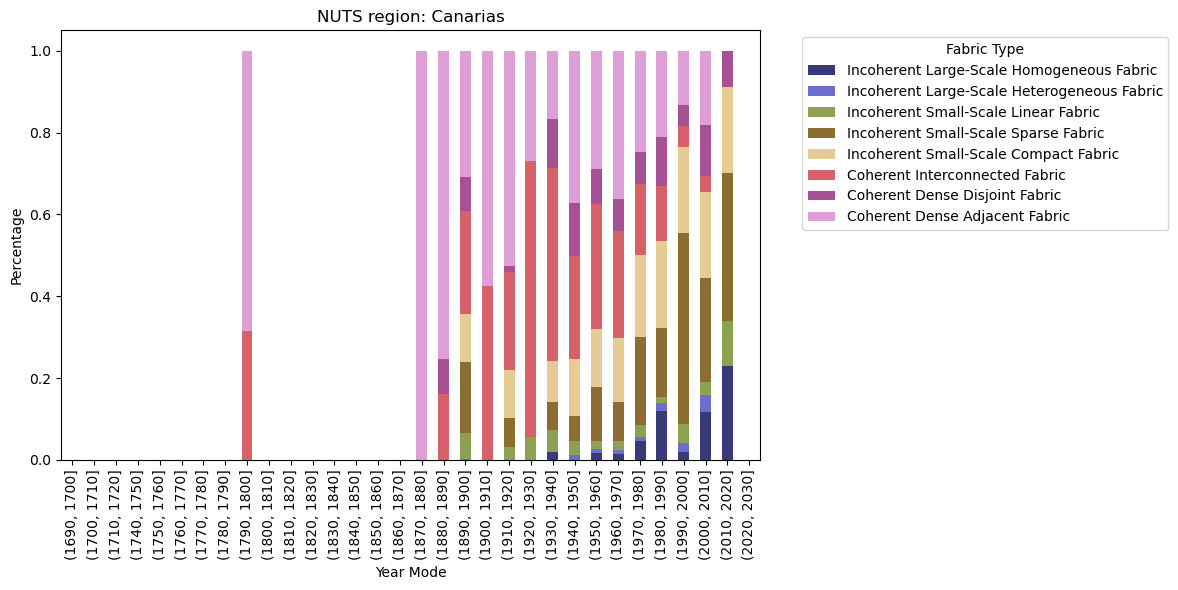

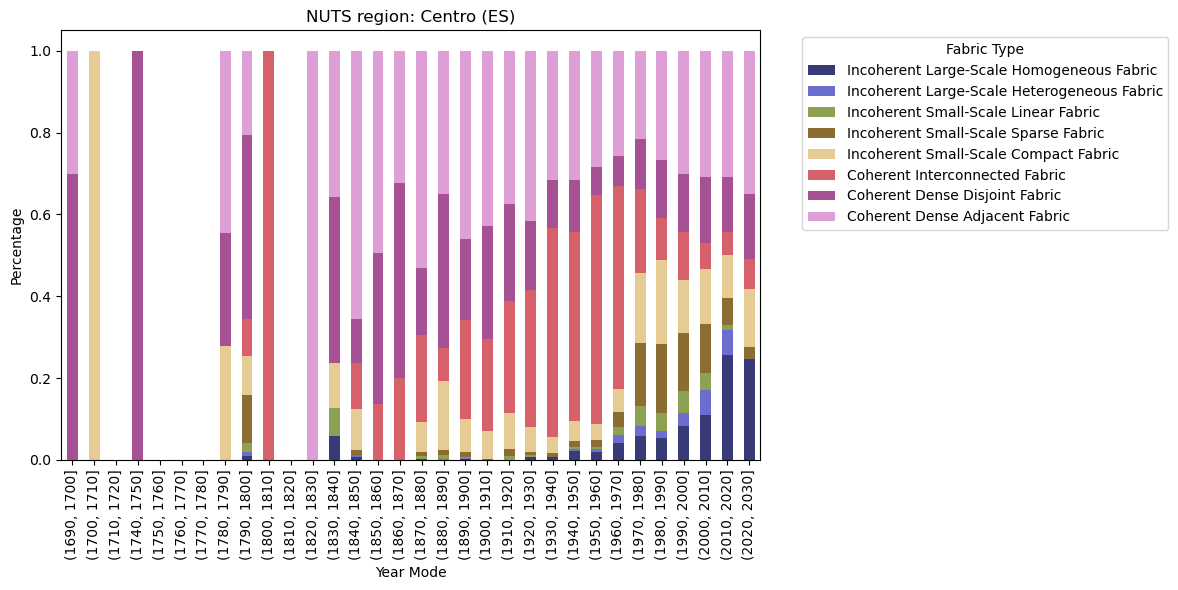

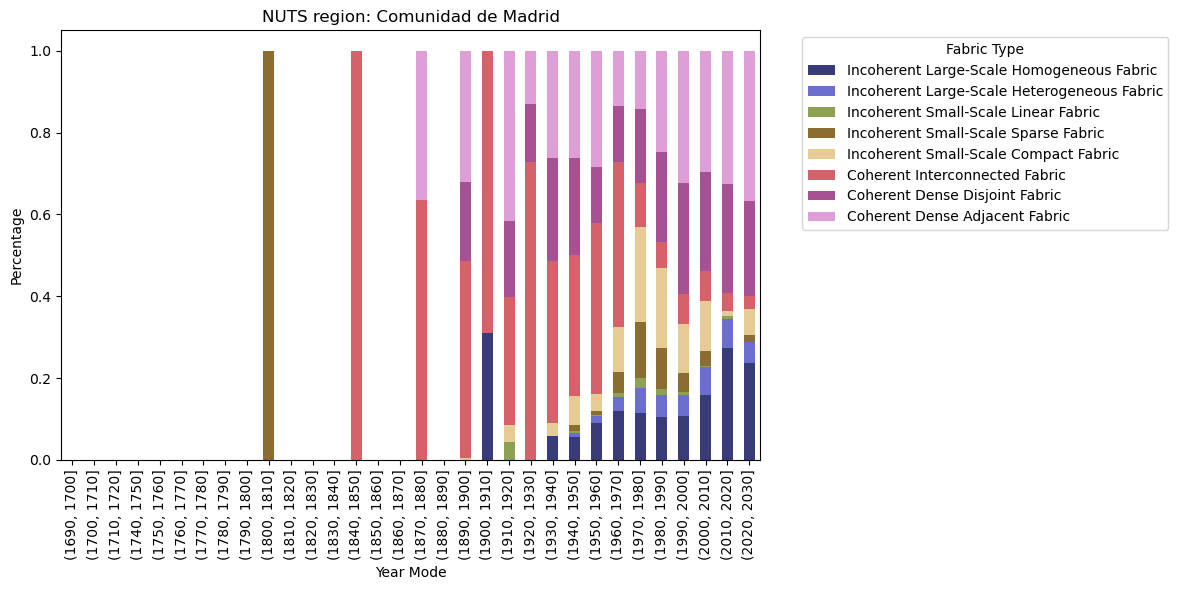

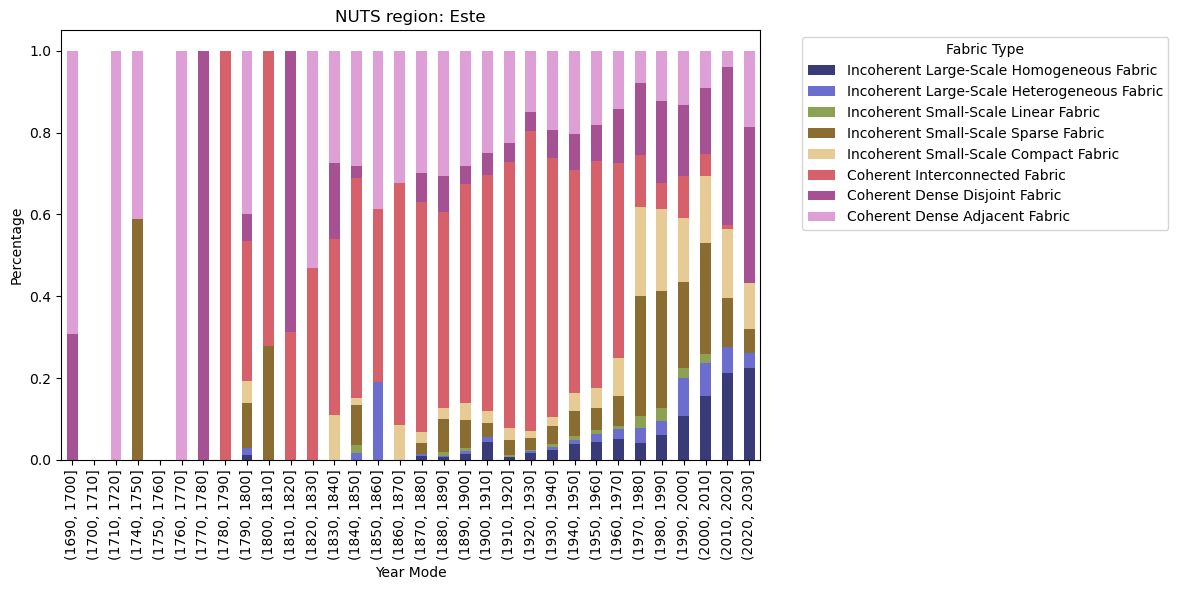

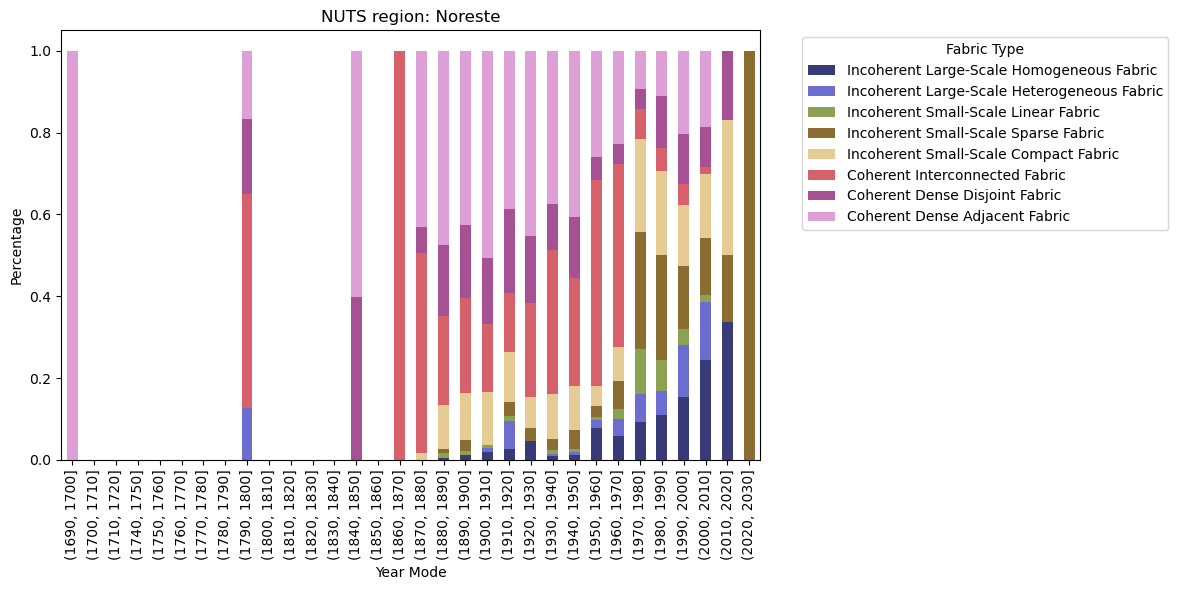

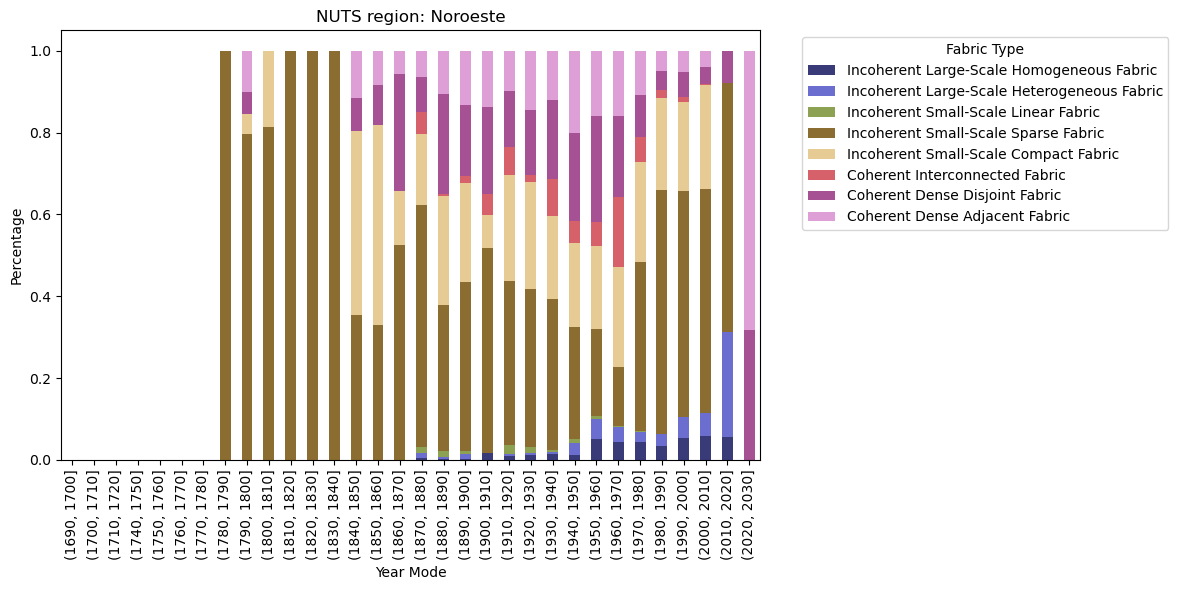

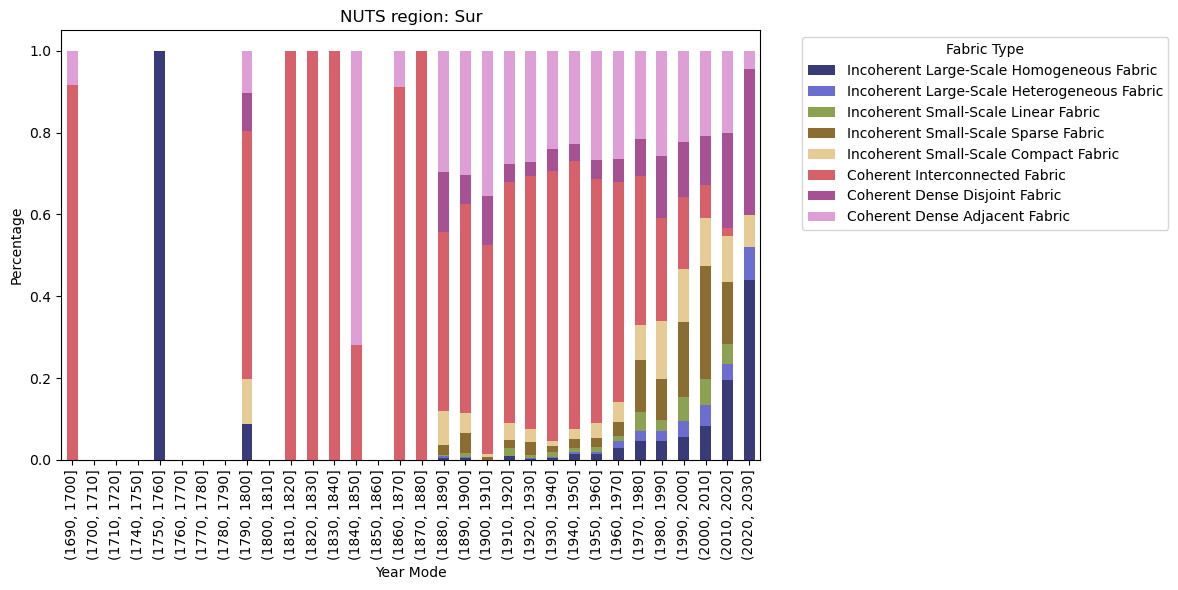

In [34]:
# Percentage columns
pct_cols = ['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct']

# All possible year_mode values
all_year_modes = sorted(nuts_counts['year_mode'].unique())

# Unique NUTS regions
nuts_list = nuts_counts['NUTS_NAME'].unique()

for nut in nuts_list:
    df_nut = nuts_counts[nuts_counts['NUTS_NAME'] == nut].copy()
    
    # Ensure all year_mode bins exist, fill missing with zeros
    df_nut = df_nut.set_index('year_mode').reindex(all_year_modes, fill_value=0)
    
    # Plot stacked bar chart
    ax = df_nut[pct_cols].plot(
        kind='bar',
        stacked=True,
        figsize=(12,6),
        colormap='tab20b'
    )
    
    ax.set_title(f"NUTS region: {nut}")
    ax.set_ylabel("Percentage")
    ax.set_xlabel("Year Mode")
    
    # Rename legend using type_names
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, [type_names[col.replace('_pct','')] for col in pct_cols],
              bbox_to_anchor=(1.05, 1), loc='upper left', title="Fabric Type")
    
    plt.tight_layout()